<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Sameer_Statisticaltests_mimicdatavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

Cloning into 'handson-ml-mimic-iv'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 29), reused 40 (delta 13), pack-reused 0
Receiving objects: 100% (83/83), 3.86 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
%cd handson-ml-mimic-iv

/content/handson-ml-mimic-iv/handson-ml-mimic-iv


In [ ]:
import os
print(os.getcwd())

/content/handson-ml-mimic-iv/handson-ml-mimic-iv


In [ ]:
import os
os.chdir('/content/handson-ml-mimic-iv')

In [ ]:
from mimic.mimic import MIMIC, MIMICManipulations
from utils.util import generic_utils

In [ ]:
import pandas as pd


updated_df_path = '/content/drive/MyDrive/dataset/ch_02_end_to_end_ml.csv'
updated_df = pd.read_csv(updated_df_path, low_memory=False)

print("Column names in the updated DataFrame:")
print(updated_df.columns.tolist())


Column names in the updated DataFrame:
['subject_id', 'admission_type', 'admit_provider_id', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age', 'eventtype', 'careunit', 'diagnosis_icd_code', 'procedures_icd_code', 'drg_type', 'drg_code', 'medication', 'event_txt', 'drug', 'route', 'org_name', 'test_name', 'quantity', 'ab_name', 'curr_service']


#Data visualisation:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
patients_path = '/content/drive/MyDrive/mimiv-iv/patients.parquet'
icustays_path = '/content/drive/MyDrive/mimiv-iv/icustays.parquet'

patients_df = pd.read_parquet(patients_path)
icustays_df = pd.read_parquet(icustays_path)

# Convert relevant columns to datetime
icustays_df['intime'] = pd.to_datetime(icustays_df['intime'])
icustays_df['outtime'] = pd.to_datetime(icustays_df['outtime'])

# Calculate LOS from admittime and dischtime
icustays_df['calculated_los'] = (icustays_df['outtime'] - icustays_df['intime']).dt.total_seconds() / (3600 * 24)  # Convert to days

# Remove negative LOS values
icustays_df = icustays_df[icustays_df['calculated_los'] >= 0]

# Summary statistics for both LOS
average_los_icustays = icustays_df['los'].mean()
average_calculated_los = icustays_df['calculated_los'].mean()

print(f"Average LOS (ICU Stays): {average_los_icustays} days")
print(f"Average LOS (Calculated): {average_calculated_los} days")

# Create bins for the LOS ranges
los_bins = [0, 1, 3, 5, 7, 10, 15, 20, 30, 50, 100, icustays_df['los'].max()]
los_labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10-15', '15-20', '20-30', '30-50', '50-100', '100+']
icustays_df['los_range'] = pd.cut(icustays_df['los'], bins=los_bins, labels=los_labels, right=False)
icustays_df['calculated_los_range'] = pd.cut(icustays_df['calculated_los'], bins=los_bins, labels=los_labels, right=False)

# Calculate counts for each LOS range
los_counts_icustays = icustays_df['los_range'].value_counts().sort_index()
los_counts_calculated = icustays_df['calculated_los_range'].value_counts().sort_index()



Average LOS (ICU Stays): 3.4519307613372803 days
Average LOS (Calculated): 3.451930759925795 days


In [ ]:
# Define the path to the omr.parquet file
file_path = '/content/drive/MyDrive/mimiv-iv/omr.parquet'

# Read the parquet file
omr_df = pd.read_parquet(file_path)

# Display the first two rows of the dataframe
print("First two rows of omr.parquet:")
print(omr_df.head(10))


First two rows of omr.parquet:
   subject_id   chartdate  seq_num      result_name result_value
0    10000032  2180-04-27        1   Blood Pressure       110/65
1    10000032  2180-04-27        1     Weight (Lbs)           94
2    10000032  2180-05-07        1      BMI (kg/m2)         18.0
3    10000032  2180-05-07        1  Height (Inches)           60
4    10000032  2180-05-07        1     Weight (Lbs)        92.15
5    10000032  2180-05-07        2     Weight (Lbs)        92.15
6    10000032  2180-05-07        3     Weight (Lbs)        92.15
7    10000032  2180-05-07        4     Weight (Lbs)        92.15
8    10000032  2180-05-07        5     Weight (Lbs)        92.15
9    10000032  2180-05-07        6     Weight (Lbs)        92.15


Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag'],
      dtype='object')


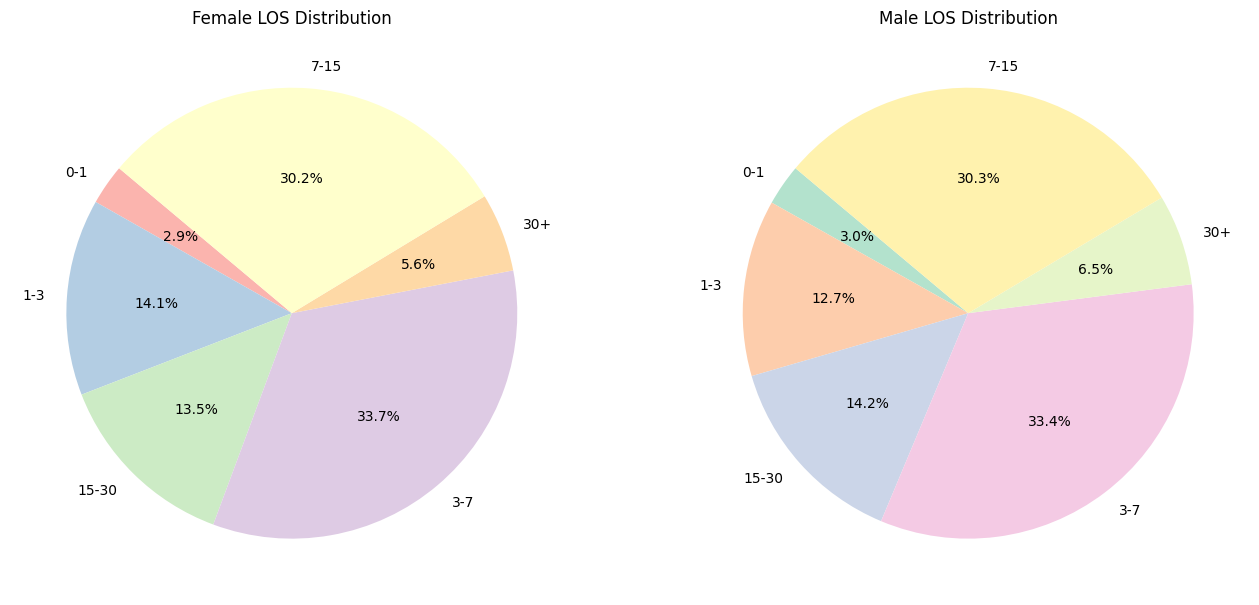

gender                  F      M
calculated_los_agg              
0-1                   938   1205
1-3                  4557   5162
15-30                4350   5786
3-7                 10899  13607
30+                  1821   2657
7-15                 9770  12367


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the datasets
patients_path = '/content/drive/MyDrive/mimiv-iv/patients.parquet'
icustays_path = '/content/drive/MyDrive/mimiv-iv/icustays.parquet'
admissions_path = '/content/drive/MyDrive/mimiv-iv/admissions.parquet'

patients_df = pd.read_parquet(patients_path)
icustays_df = pd.read_parquet(icustays_path)
admissions_df = pd.read_parquet(admissions_path)

# Check the columns in admissions_df to verify 'admission_type'
print(admissions_df.columns)

# Convert relevant columns to datetime
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'], errors='coerce')
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'], errors='coerce')

# Calculate LOS using 'admittime' and 'dischtime'
admissions_df['calculated_los'] = (admissions_df['dischtime'] - admissions_df['admittime']).dt.total_seconds() / (24 * 3600)  # Convert to days

# Merge DataFrames on 'subject_id' and 'hadm_id'
merged_df = pd.merge(admissions_df[['subject_id', 'hadm_id', 'admittime', 'dischtime', 'calculated_los', 'admission_type']],
                     icustays_df[['subject_id', 'hadm_id', 'los']],
                     on=['subject_id', 'hadm_id'], how='inner')

# Remove negative LOS values
merged_df = merged_df[merged_df['calculated_los'] >= 0]
merged_df = merged_df[merged_df['los'] >= 0]

# Merge with patients to get gender
merged_df = pd.merge(merged_df, patients_df[['subject_id', 'gender']], on='subject_id', how='inner')

# Aggregate LOS ranges for clarity
def aggregate_los_ranges(los):
    if los < 1:
        return '0-1'
    elif los < 3:
        return '1-3'
    elif los < 7:
        return '3-7'
    elif los < 15:
        return '7-15'
    elif los < 30:
        return '15-30'
    else:
        return '30+'

merged_df['calculated_los_agg'] = merged_df['calculated_los'].apply(aggregate_los_ranges)

# Calculate counts for each aggregated LOS range by gender
los_counts_gender_agg = merged_df.groupby(['calculated_los_agg', 'gender']).size().unstack().fillna(0)

# Data for pie chart
los_ranges_agg = los_counts_gender_agg.index
female_counts_agg = los_counts_gender_agg['F'].values
male_counts_agg = los_counts_gender_agg['M'].values

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for female patients
axes[0].pie(female_counts_agg, labels=los_ranges_agg, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors, startangle=140)
axes[0].set_title('Female LOS Distribution')

# Pie chart for male patients
axes[1].pie(male_counts_agg, labels=los_ranges_agg, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors, startangle=140)
axes[1].set_title('Male LOS Distribution')

plt.show()

# Print the LOS counts for interpretation
print(los_counts_gender_agg)

#

#STATISTICAL ANALYSIS

#CHI SQUARED TEST

In [ ]:
import scipy.stats as stats

# Calculate counts for each aggregated LOS range by gender
los_counts_gender_agg = merged_df.groupby(['calculated_los_agg', 'gender']).size().unstack().fillna(0)

# Chi-Squared Test for Independence
chi2, p, dof, ex = stats.chi2_contingency(los_counts_gender_agg)
print(f'Chi-squared Test:\nChi2 Statistic: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}')
print(f'Expected Frequencies:\n{ex}')


Chi-squared Test:
Chi2 Statistic: 58.845449226472006
P-value: 2.1047868222675888e-11
Degrees of Freedom: 5
Expected Frequencies:
[[  947.68671618  1195.31328382]
 [ 4297.97815889  5421.02184111]
 [ 4482.38570002  5653.61429998]
 [10837.14916779 13668.85083221]
 [ 1980.28050165  2497.71949835]
 [ 9789.51975547 12347.48024453]]


**Chi-Squared Test for Independence**

Purpose: To determine if there is a significant association between gender and LOS categories.

**Results:**

Chi2 Statistic: 58.845
P-value: 2.1047868222675888e-11
Degrees of Freedom: 5
Expected Frequencies: These are the frequencies you would expect if there were no association between gender and LOS categories.
Interpretation:

The p-value (2.10e-11) is significantly less than 0.05, indicating strong evidence against the null hypothesis. This means there is a significant association between gender and LOS categories. The distribution of LOS is not independent of gender.

#T TEST

In [ ]:
# Separate the LOS data by gender
female_los = merged_df[merged_df['gender'] == 'F']['calculated_los']
male_los = merged_df[merged_df['gender'] == 'M']['calculated_los']

# Perform t-test
t_stat, p_val = stats.ttest_ind(female_los, male_los, equal_var=False)
print(f'T-Test for Mean LOS:\nT-statistic: {t_stat}\nP-value: {p_val}')


T-Test for Mean LOS:
T-statistic: -8.266262323983408
P-value: 1.4054041942992763e-16


**T-Test for Mean LOS**

Purpose: To compare the mean LOS between male and female patients.

**Results:**

T-statistic: -8.266
P-value: 1.4054041942992763e-16
Interpretation:

The p-value (1.40e-16) is significantly less than 0.05, indicating strong evidence against the null hypothesis. This means there is a significant difference in the mean LOS between male and female patients. The negative t-statistic suggests that, on average, females have a shorter LOS than males.

#ANOVA

In [ ]:
# ANOVA for LOS Across Multiple Groups (assuming 'admission_type' is a categorical variable)
anova_results = stats.f_oneway(*(group['calculated_los'].values for name, group in merged_df.groupby('admission_type')))
print(f'ANOVA for LOS by Admission Type:\nF-statistic: {anova_results.statistic}\nP-value: {anova_results.pvalue}')


ANOVA for LOS by Admission Type:
F-statistic: 158.15414915968344
P-value: 1.6345573217866548e-265


**ANOVA for LOS by Admission Type**
Purpose: To determine if there are significant differences in LOS across different admission types.

**Results:**

F-statistic: 158.154
P-value: 1.6345573217866548e-265
Interpretation:

The p-value (1.63e-265) is significantly less than 0.05, indicating strong evidence against the null hypothesis. This means there are significant differences in LOS across different admission types. The high F-statistic suggests that the differences between group means are much larger than the variability within groups.

#MANN WHITNEY U TEST

In [100]:
# Mann-Whitney U Test
u_stat, p_val = stats.mannwhitneyu(female_los, male_los)
print(f'Mann-Whitney U Test:\nU-statistic: {u_stat}\nP-value: {p_val}')


Mann-Whitney U Test:
U-statistic: 639788588.5
P-value: 4.860089069476792e-12


The Mann-Whitney U Test compares the length of hospital stay (LOS) between male and female patients. It found a U-statistic of 639,788,588.5, which measures how different the two groups are. The p-value is extremely small (4.86e-12), indicating a significant difference between the LOS for males and females.

In simple terms, this test shows that the length of stay in the hospital is different for men and women. The very small p-value means this difference is unlikely to be due to chance, suggesting that gender affects how long patients stay in the hospital.

# KRUSKAL WALLIS H TEST

In [99]:
# Kruskal-Wallis H Test
kruskal_results = stats.kruskal(*(group['calculated_los'].values for name, group in merged_df.groupby('admission_type')))
print(f'Kruskal-Wallis H Test for LOS by Admission Type:\nH-statistic: {kruskal_results.statistic}\nP-value: {kruskal_results.pvalue}')


Kruskal-Wallis H Test for LOS by Admission Type:
H-statistic: 2973.647606826819
P-value: 0.0


The Kruskal-Wallis H Test compares the length of hospital stay (LOS) across different admission types. It found an H-statistic of 2973.65, indicating substantial differences among the groups. The p-value is 0.0, showing these differences are highly significant.

In simple terms, this test shows that the type of admission significantly affects how long patients stay in the hospital. The very small p-value means this difference is not due to chance.

#CORRELATION ANALYSIS

In [102]:
# Correlation Analysis
if 'anchor_age' in merged_df.columns:
    correlation, p_val = stats.pearsonr(merged_df['anchor_age'], merged_df['calculated_los'])
    print(f'Correlation Analysis:\nCorrelation Coefficient: {correlation}\nP-value: {p_val}')
else:
    print("Column 'anchor_age' not found in merged DataFrame.")

Correlation Analysis:
Correlation Coefficient: -0.03024987676213429
P-value: 2.8043026933816424e-16


The correlation analysis examines the relationship between patients' age and the length of hospital stay (LOS). The correlation coefficient is -0.030, indicating a very weak negative relationship between age and LOS. This means that as age increases, LOS slightly decreases, but the effect is minimal.

The p-value is 2.80e-16, which is extremely small, indicating that this weak negative correlation is statistically significant. In other words, the relationship, although very weak, is unlikely to be due to random chance.